# Описание проекта

Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.    
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:    
- лог сервера с данными об их посещениях,    
- выгрузка их покупок за этот период,    
- рекламные расходы.    

Вам предстоит изучить:    
- откуда приходят пользователи и какими устройствами они пользуются,    
- сколько стоит привлечение пользователей из различных рекламных каналов;    
- сколько денег приносит каждый клиент,    
- когда расходы на привлечение клиента окупаются,    
- какие факторы мешают привлечению клиентов.    

# Описание данных

В вашем распоряжении три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.    

Структура visits_info_short.csv:
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.    

Структура orders_info_short.csv:
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.    

Структура costs_info_short.csv:
- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.

Цель исследования — разобраться в причинах почему несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки и помочь компании выйти в плюс.

Ход исследования:
- изучить откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов,
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import numpy as np

Импортируем необходимые библиотеки.

In [2]:
sessions=pd.read_csv('/datasets/visits_info_short.csv')
orders=pd.read_csv('/datasets/orders_info_short.csv')
ad_costs=pd.read_csv('/datasets/costs_info_short.csv')

Загрузим данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

In [3]:
sessions.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
sessions.isna().sum()

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

In [5]:
sessions.duplicated().sum()

0

In [6]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [7]:
orders

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


In [8]:
orders.isna().sum()

User Id     0
Event Dt    0
Revenue     0
dtype: int64

In [9]:
orders.duplicated().sum()

0

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [11]:
ad_costs

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


In [12]:
ad_costs.isna().sum()

dt         0
Channel    0
costs      0
dtype: int64

In [13]:
ad_costs.duplicated().sum()

0

In [14]:
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Изучим данные: пропуски и дубликаты в данных отсутствуют. Необходимо изменить тип данных с object на datetime в некоторых колонках и привести их к змеиному регистру.

In [15]:
sessions=sessions.rename(columns={'User Id':'user_id','Region':'region','Device':'device','Channel':'channel','Session Start':'session_start','Session End':'session_end'})
orders=orders.rename(columns={'User Id':'user_id','Event Dt':'event_dt','Revenue':'revenue'})
ad_costs=ad_costs.rename(columns={'Channel':'channel'})

Приведем названия столбцов датафреймов к змеиному регистру и переименуем их для удобства работы с готовыми функциями.

In [16]:
sessions['session_start']=pd.to_datetime(sessions['session_start'])
sessions['session_end']=pd.to_datetime(sessions['session_end'])
orders['event_dt']=pd.to_datetime(orders['event_dt'])
ad_costs['dt'] = pd.to_datetime(ad_costs['dt']).dt.date

Изменим тип данных на datetime.

Качество исходных данных хорошее, пропуски и дубликаты в данных отсутствуют, данные полные - результаты анализа искажены не будут. В ходе предобработки мною были изменены типы данных и названия столбцов в соответствии со змеиным регистром.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

Зададим функции для вычисления значений метрик:

In [17]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [18]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [19]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [20]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

Зададим функции для построения графиков:

In [21]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [22]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [23]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [24]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [25]:
profiles = get_profiles(sessions, orders, ad_costs)
profiles.head(10)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
5,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-01,False,0.000000
6,38448301,2019-08-16 11:56:00,organic,Android,United States,2019-08-16,2019-08-01,False,0.000000
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-01,False,0.250435


In [26]:
min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max()
print('Минимальная дата привлечения пользователей:', min_analysis_date)
print('Максимальная дата привлечения пользователей:', observation_date)

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


Составили профили пользователей и определили минимальную и максимальную даты привлечения пользователей - они верны, не конфликтуют с условием задания. 

In [27]:
country_users = pd.DataFrame()
country_users['total_users_amount'] = profiles.groupby('region')['user_id'].count()
country_users['share_users (%)'] = round(((country_users['total_users_amount'] / profiles['region'].count()) * 100),2)
country_users.sort_values(by='share_users (%)', ascending=False)

,total_users_amount,share_users (%)
region,,
United States,100002,66.66
UK,17575,11.72
France,17450,11.63
Germany,14981,9.99


Выясним, из каких стран пользователи приходят в приложение. Больше всего пользователей из США, далее Великобритания и Франция - примерно на одном уровне, меньше всего пользователей из Германии.

In [28]:
country_payers = pd.DataFrame()
country_payers['users_payers_amount'] = profiles.query('payer == True').groupby('region')['user_id'].count()
country_payers['share_users_payers (%)'] = round(((country_payers['users_payers_amount'] / profiles.query('payer == True')['region'].count()) * 100), 2)
country_payers.sort_values(by='share_users_payers (%)', ascending=False)

,users_payers_amount,share_users_payers (%)
region,,
United States,6902,77.72
UK,700,7.88
France,663,7.47
Germany,616,6.94


Выясним на какую страну приходится больше всего платящих пользователей. Абсолоютный лидер - США, далее - Великобритания, Франция и Германия, примерно в равных долях.

In [29]:
final = country_users.merge(country_payers, on='region').sort_values(by='total_users_amount', ascending = False)
final['share_users_payers_by_country (%)'] = round(final['users_payers_amount']/final['total_users_amount']*100, 2)
final

,total_users_amount,share_users (%),users_payers_amount,share_users_payers (%),share_users_payers_by_country (%)
region,,,,,
United States,100002,66.66,6902,77.72,6.90
UK,17575,11.72,700,7.88,3.98
France,17450,11.63,663,7.47,3.80
Germany,14981,9.99,616,6.94,4.11


Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны. Здесь, так же, как и выше, лидирует США (6,9%), далее идет Германия (4,11%), Великобритания (3,98%) и Франция (3,8%).

In [30]:
device_users = pd.DataFrame()
device_users['total_users_amount'] = profiles.groupby('device')['user_id'].count()
device_users['share_users (%)'] = round(((device_users['total_users_amount'] / profiles['device'].count()) * 100),2)
device_users.sort_values(by='share_users (%)', ascending=False)

,total_users_amount,share_users (%)
device,,
iPhone,54479,36.32
Android,35032,23.35
PC,30455,20.30
Mac,30042,20.03


Узнаем, какими устройствами пользуются клиенты. Чаще всего пользуются iPhone, затем Android и PC и Mac в примерно равных долях.

In [31]:
device_payers = pd.DataFrame()
device_payers['users_payers_amount'] = profiles.query('payer == True').groupby('device')['user_id'].count()
device_payers['share_users_payers (%)'] = round(((device_payers['users_payers_amount'] / profiles.query('payer == True')['device'].count()) * 100), 2)
device_payers.sort_values(by='share_users_payers (%)', ascending=False)

,users_payers_amount,share_users_payers (%)
device,,
iPhone,3382,38.08
Android,2050,23.08
Mac,1912,21.53
PC,1537,17.31


Узнаем какие устройства предпочитают платящие пользователи. С отрывом лидирует iPhone, за ним Android и Mac, наименьшее количество платящих пользователей у PC.

In [32]:
final_2 = device_users.merge(device_payers, on='device').sort_values(by='total_users_amount', ascending = False)
final_2['share_users_payers_by_country (%)'] = round(final_2['users_payers_amount']/final_2['total_users_amount']*100, 2)
final_2

,total_users_amount,share_users (%),users_payers_amount,share_users_payers (%),share_users_payers_by_country (%)
device,,,,,
iPhone,54479,36.32,3382,38.08,6.21
Android,35032,23.35,2050,23.08,5.85
PC,30455,20.30,1537,17.31,5.05
Mac,30042,20.03,1912,21.53,6.36


Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства. Лидируют устройства корпорации Apple - Mac (6,36%) и iPhone (6,21%), за ними Android (5,85%) и PC (5,05%).

In [33]:
ad_users = pd.DataFrame()
ad_users['total_users_amount'] = profiles.groupby('channel')['user_id'].count()
ad_users['share_users (%)'] = round(((ad_users['total_users_amount'] / profiles['channel'].count()) * 100),2)
ad_users.sort_values(by='share_users (%)', ascending=False)

,total_users_amount,share_users (%)
channel,,
organic,56439,37.62
FaceBoom,29144,19.43
TipTop,19561,13.04
OppleCreativeMedia,8605,5.74
LeapBob,8553,5.70
WahooNetBanner,8553,5.70
RocketSuperAds,4448,2.97
MediaTornado,4364,2.91
YRabbit,4312,2.87


Изучим рекламные источники привлечения. Больше всего пользавателей приходят самостоятельно (organic), среди лидеров так же FaceBoom и TipTop.

In [34]:
ad_payers = pd.DataFrame()
ad_payers['users_payers_amount'] = profiles.query('payer == True').groupby('channel')['user_id'].count()
ad_payers['share_users_payers (%)'] = round(((ad_payers['users_payers_amount'] / profiles.query('payer == True')['channel'].count()) * 100), 2)
ad_payers.sort_values(by='share_users_payers (%)', ascending=False)

,users_payers_amount,share_users_payers (%)
channel,,
FaceBoom,3557,40.05
TipTop,1878,21.15
organic,1160,13.06
WahooNetBanner,453,5.10
AdNonSense,440,4.95
RocketSuperAds,352,3.96
LeapBob,262,2.95
OppleCreativeMedia,233,2.62
lambdaMediaAds,225,2.53


Определим каналы, из которых пришло больше всего платящих пользователей. Лидеры те же, только в другом порядке: FaceBoom, TipTop и organic.

In [35]:
final_3 = ad_users.merge(ad_payers, on='channel').sort_values(by='total_users_amount', ascending = False)
final_3['share_users_payers_by_country (%)'] = round(final_3['users_payers_amount']/final_3['total_users_amount']*100, 2)
final_3

,total_users_amount,share_users (%),users_payers_amount,share_users_payers (%),share_users_payers_by_country (%)
channel,,,,,
organic,56439,37.62,1160,13.06,2.06
FaceBoom,29144,19.43,3557,40.05,12.20
TipTop,19561,13.04,1878,21.15,9.60
OppleCreativeMedia,8605,5.74,233,2.62,2.71
LeapBob,8553,5.70,262,2.95,3.06
WahooNetBanner,8553,5.70,453,5.10,5.30
RocketSuperAds,4448,2.97,352,3.96,7.91
MediaTornado,4364,2.91,156,1.76,3.57
YRabbit,4312,2.87,165,1.86,3.83


Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения. Топ-3 каналами привлечения по платящим пользователям являются: FaceBoom (12,2%), AdNonSense (11,34%) и lambdaMediaAds (10,47%), меньше всего платят пользователи organic (2,06%).

В ходе исследовательского анализа данных мы рассмотрели из каких стран пользователи приходят в приложение, какими устройствами пользуются и какие рекламные источники привлечения клиентов самый лучшие. Так же расчитали долю платящих пользователей для каждого параметра. Визуалировали данные путем построения таблиц.

Проанализировав данные, становится понятно, что подавляющее число пользователей (в т.ч. платящих) из США. Учтем этот факт в следующем пункте проекта, где более детально будем рассматривать показатели окупаемости. Лидирующие устройства - iPhone и Android. Наибольшее число пользователей приходят в сервис "органически", однако плательщиков среди них совсем немного. Лучшие каналы привлечения платящих пользователей FaceBoom, AdNonSense и lambdaMediaAds. 



### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [36]:
print('Общая сумма расходов на маркетинг:', ad_costs.costs.sum().round())

Общая сумма расходов на маркетинг: 105497.0


In [37]:
ad_costs.pivot_table(index='channel',values='costs',aggfunc='sum').sort_values(by='costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Выше представлена таблица расходов по маркетингу на каждый истоник привлечения. Больше всего было потрачено на TipTop и FaceBoom - в десятки раз больше, чем на другие каналы привлечения.

In [38]:
costs_plot = ad_costs

costs_plot['dt'] = pd.to_datetime(costs_plot['dt'])

costs_plot['month'] = costs_plot['dt'].dt.month
costs_plot['week'] = costs_plot['dt'].dt.isocalendar().week

costs_week = costs_plot.pivot_table(index='week', columns='channel', values = 'costs', aggfunc='sum')
costs_week = costs_week.rename_axis(None, axis=1).reset_index()

costs_month = costs_plot.pivot_table(index='month', columns='channel', values = 'costs', aggfunc='sum')
costs_month = costs_month.rename_axis(None, axis=1).reset_index()

channels = costs_plot['channel'].sort_values().unique()


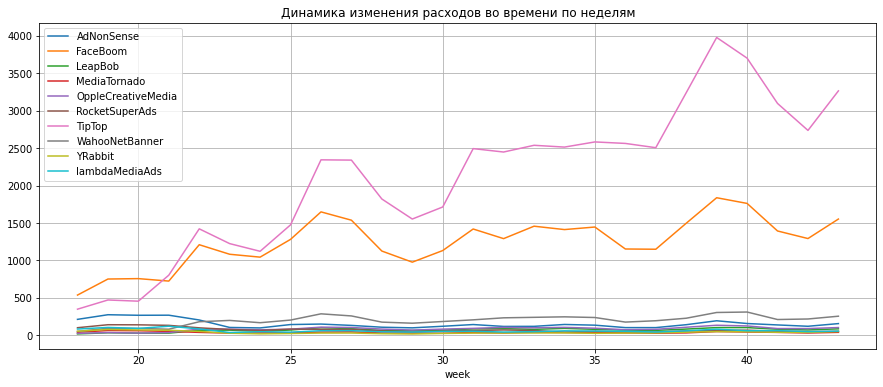

In [39]:
costs_week.plot(x='week', y=channels, figsize=(15,6), grid = True, title = 'Динамика изменения расходов во времени по неделям')
plt.show()

Постройте визуализацию динамики изменения расходов во времени по неделям по каждому источнику. На графике мы видим рост расходов на рекламу с течением времени в рассматриваемом нами периоде.

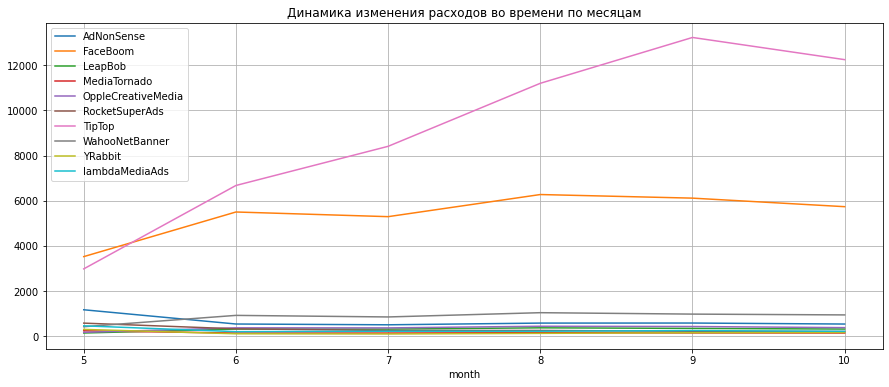

In [40]:
costs_month.plot(x='month', y=channels, figsize=(15,6), grid = True, title = 'Динамика изменения расходов во времени по месяцам')
plt.show()

Построим визуализацию динамики изменения расходов во времени по месяцам по каждому источнику. Тоже самое и здесь: видна динамика роста затрат на рекламу.

In [41]:
cac_channel = (profiles
       .pivot_table(index = 'channel',
                    values = 'acquisition_cost',
                    aggfunc='mean')
       .sort_values(by='acquisition_cost', ascending=False)
       .rename(columns={'acquisition_cost': 'cac'})
      )
cac_channel

,cac
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


In [42]:
print('Средний САС по проекту:        ', cac_channel.mean())

Средний САС по проекту:         cac    0.687032
dtype: float64


Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Сравнивая полученные данные с таблицами выше, можно сделать вывод о том, что маркетологи приложения Procrastinate Pro+ активно вкладывали финансовые средства в источники привлечения TipTop и FaceBoom.

В этом разделе проекта мы посчитали сумму расходов на маркетинг, стоимость привлечения одного пользователя по источникам и стоимость привлечения в среднем. Путем построения графиков визуализировали динамику изменения расходов во времени и пришли к выводу, что расходы с течением времени растут.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [43]:
profiles = profiles.query('channel != "organic"')

Исключим пользователей organic из дальнейшего анализа, т.к. они могут исказить результат по причине того, что их привлечение было бесплатным, но доход они все равно приносят.

In [44]:
observation_date = profiles['dt'].max() 
analysis_horizon = 14

Установим момент и горизонт анализа согласно условиям исследования.

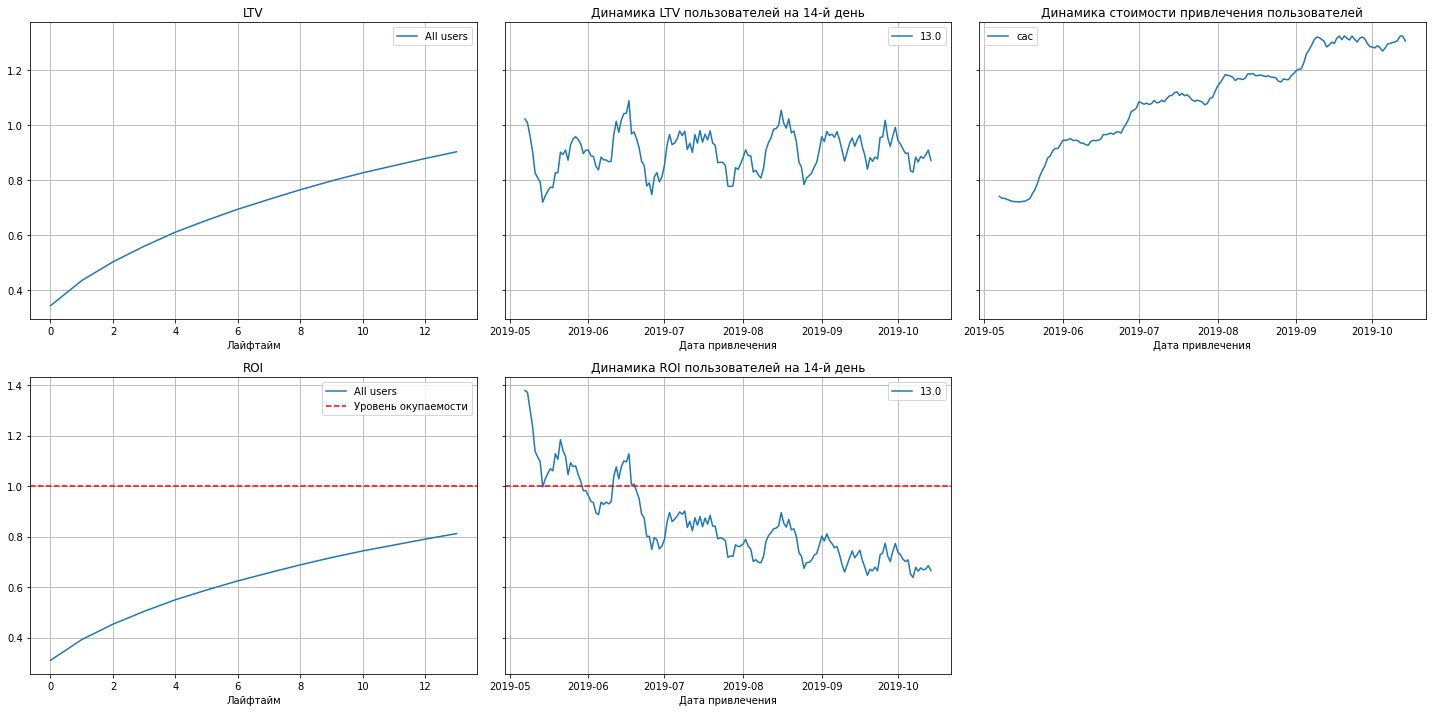

In [45]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon)

Проанализируем окупаемость рекламы. Выводы по графикам: 
- реклама не окупается (ROI к концу рассматриваемого периода — чуть выше 80%)
- САС увеличивается, значит увеличиается и рекламный бюджет
- LTV стабилен, но подвержен сезонности
- ROI начал падать начиная с конца июня

Далее проанализируем окупаемость рекламы с помощью графиков в разбивке по устройствам, странам и рекламным каналам.

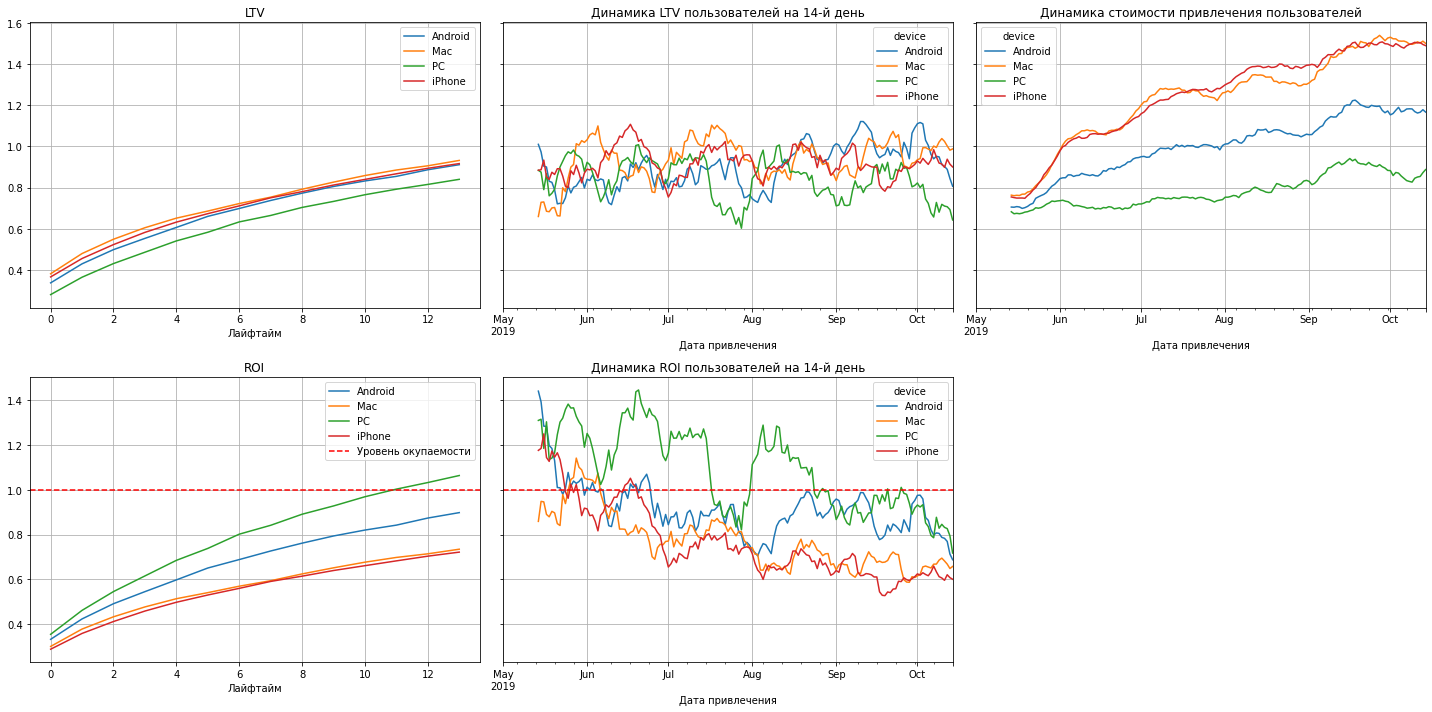

In [46]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

Стоимость привлечения пользователей растет в рассматриваемом периоде, окупаемость падает. Хочется обратить внимание на устройства компании Apple: стоимость привлечения высока, а окупаемость плохая. У PC ситуация обратная. 

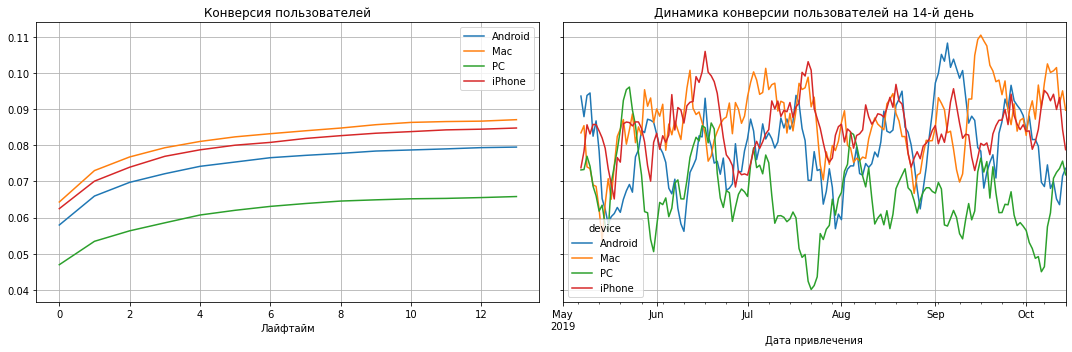

In [47]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

У Mac, iPhone и Android конверсия хорошая. Рассмотрим удержание.

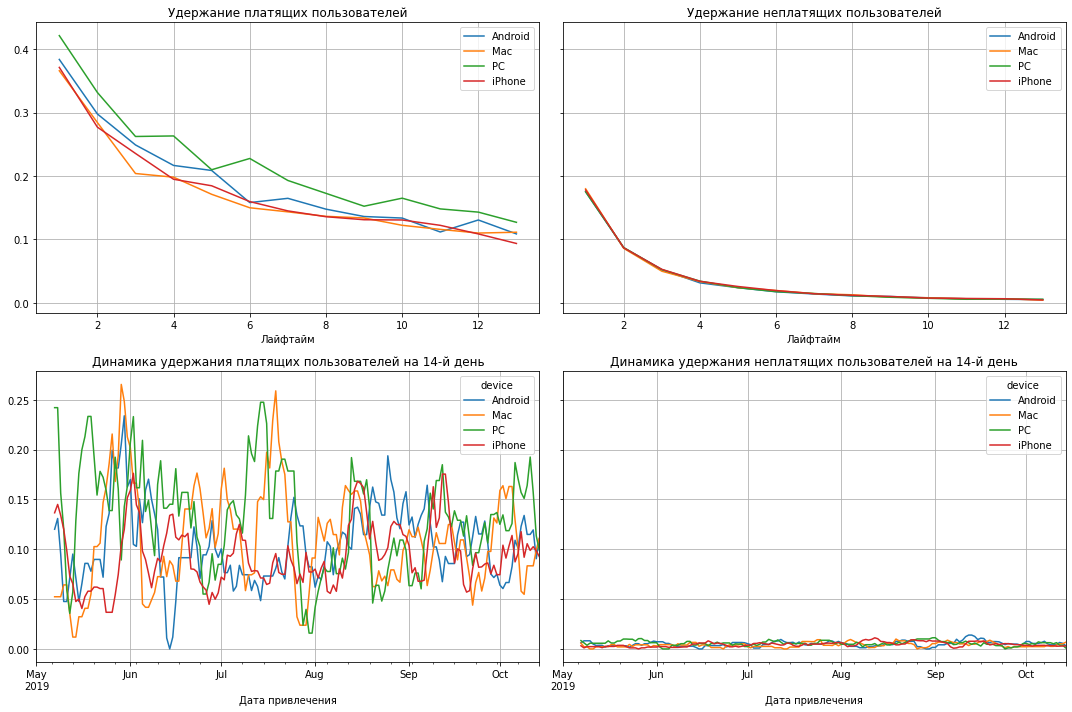

In [48]:
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, sessions, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

Лидеров среди удерживающихся полльзователей нет, все удерживаются примерно на одном уровне.

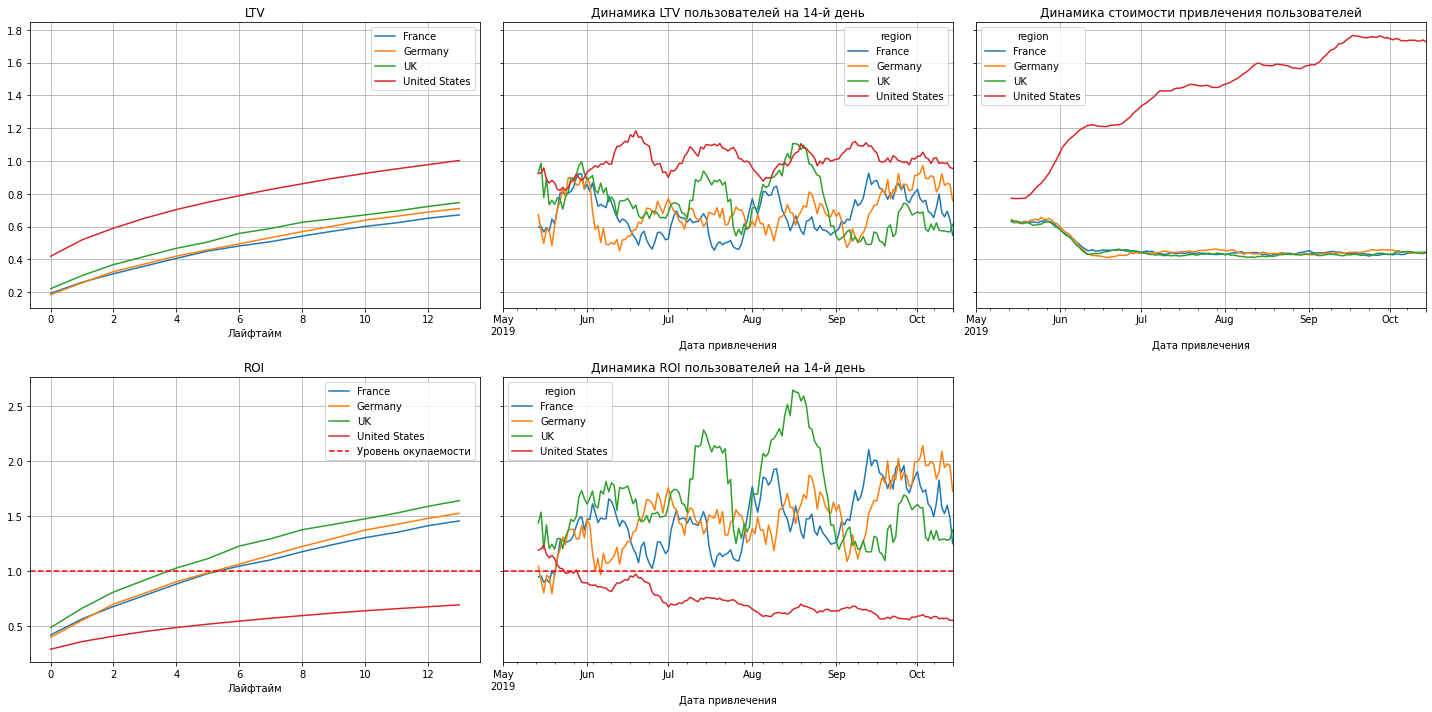

In [49]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

Хуже всего окупаются пользователи из США, несмотря на то, что стоимость привлечения этих пользователей довольно высокая. С Великобританией, Германией и Францией ситуация обратная - стоимость привлечения невысокая, окупаемость хорошая.

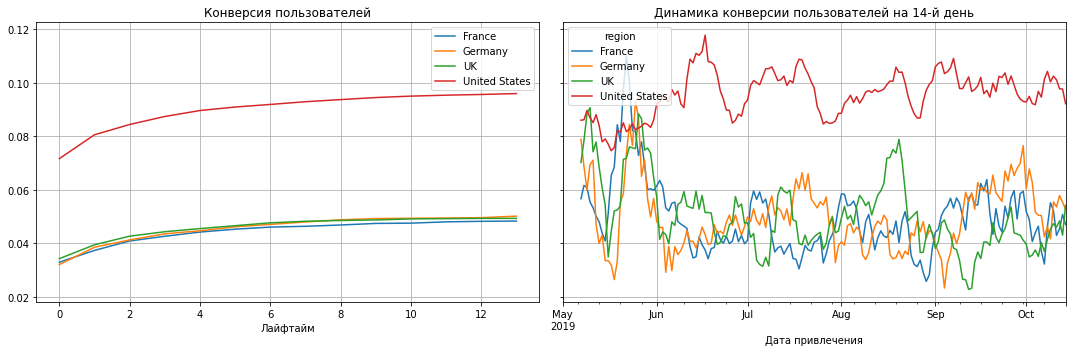

In [50]:
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

США конвертируется хорошо. У Великобритании, Германии и Франции конверсия значительно ниже.

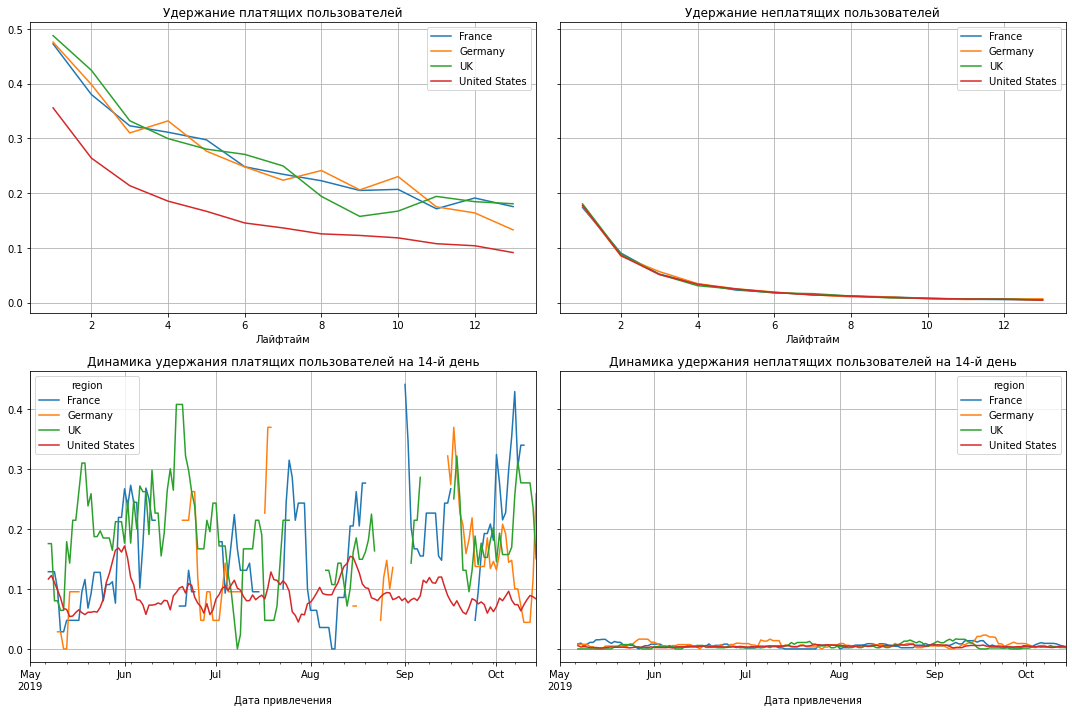

In [51]:
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, sessions, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

Пользователи из США удерживаются плохо. У Великобритании, Германии и Франции удержание выше и примерно на одном уровне.

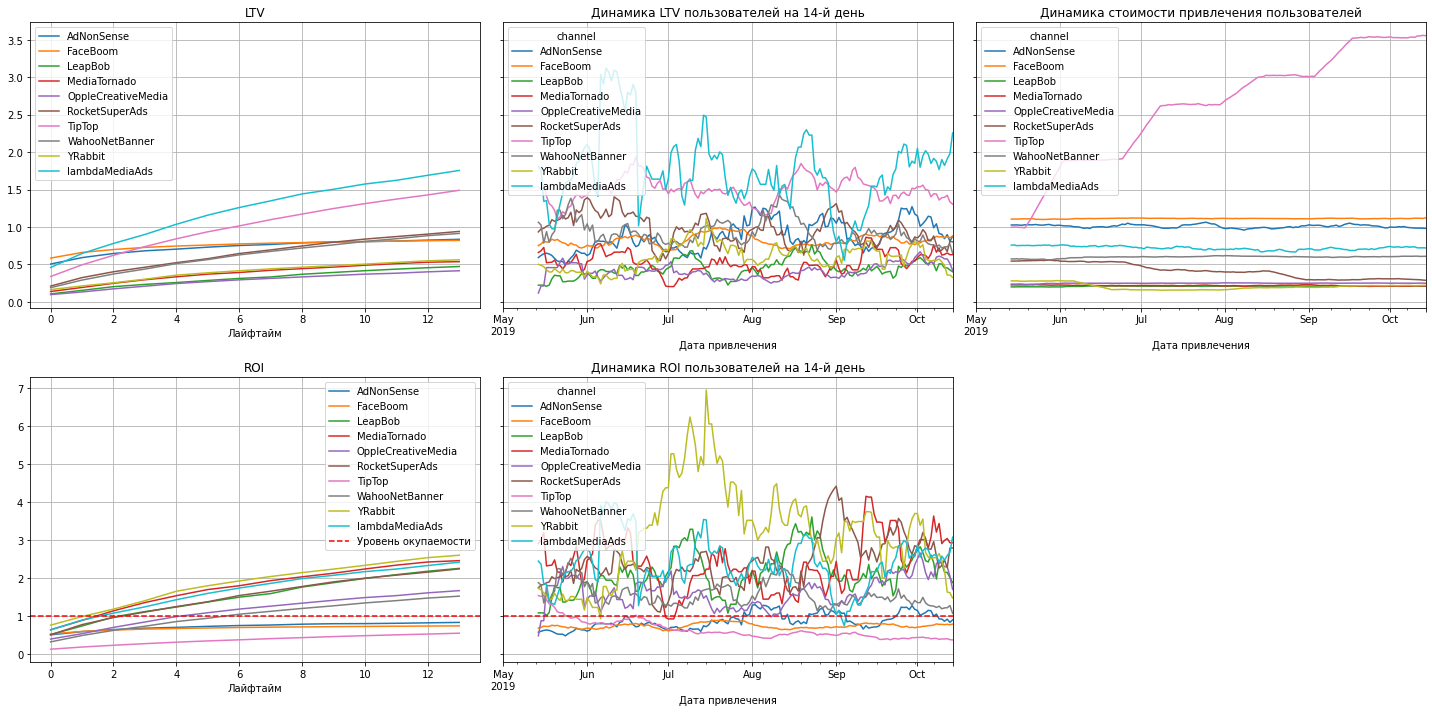

In [52]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

Видим большие затраты на рекламный канал TipTop, но при этом не окупилось, так же как и каналы AdNonSense и Faceboom. Хорошие показатели у канала YRabbit.

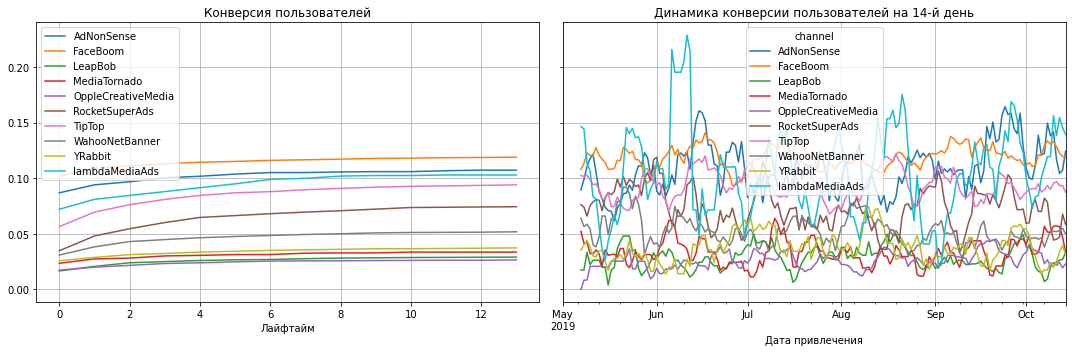

In [53]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

Худшая конверсия у каналов YRabbit, MediaTornado, LeapBob и OppleCreativeMedia.

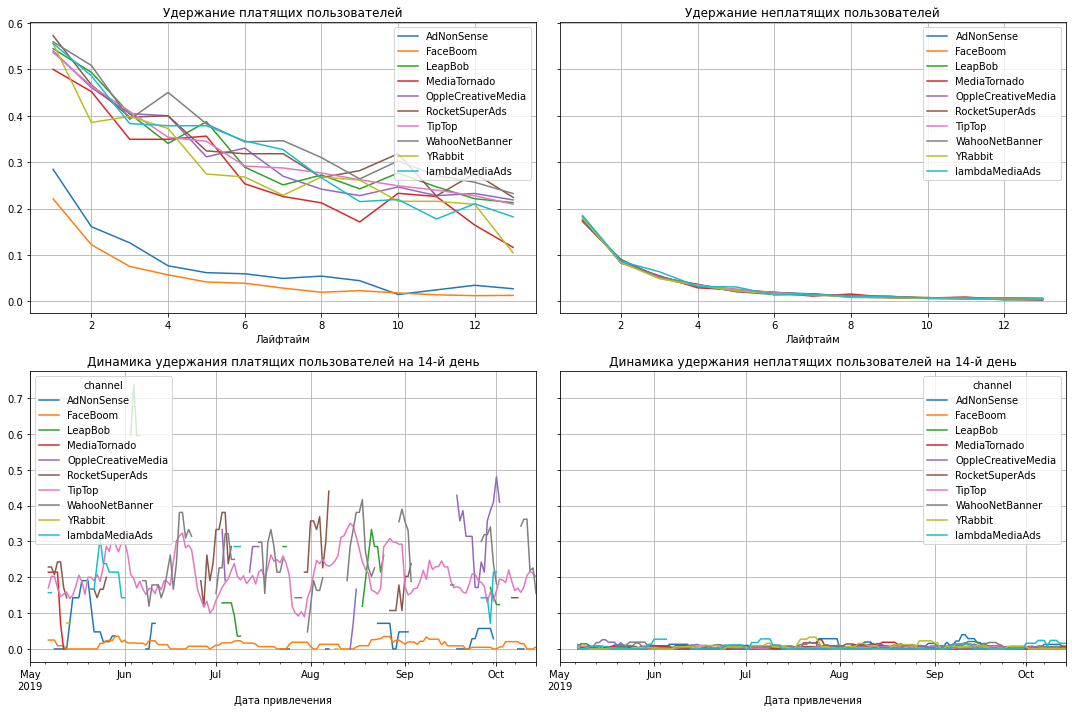

In [54]:
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, sessions, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

Плохо удерживаются пользователи FaceBoom и AdNonSense.

Вывод: реклама не окупается, негативное влияние оказывают на нее пользователи из США (много пользователей, большие траты на рекламу, плохое удержание). Рекламеные каналы TipTop, AdNonSense и Faceboom берут на себя значительную часть рекламного бюджета, при этом результаты осталяют желать лучшего.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

В ходе проделанной работы мы провели маркетинговую аналитику развлекательного приложения Procrastinate Pro+: определили почему несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки, разобрались в причинах и готовы предоставить пути решения проблемы.

Причины неэффективности привлечения пользователей: 

- реклама не окупается (ROI к концу рассматриваемого периода — чуть выше 80%)
- САС увеличивается, значит увеличиается и рекламный бюджет
- LTV стабилен, но подвержен сезонности
- ROI пользователей начал падать начиная с конца июня

В разбивке по устройствам:
- значительная часть рекламного бюджета тратится на привлечение пользователей iPhone и Mac, при этом окупаемость по этим устройствам плохая

В разбивке по странам:
- стоимость привлечения пользователей из США очень высока, при этом они не окупаются

В разбивке по каналам привлечения:
- На TipTop, AdNonSense и Faceboom обходятся компании дорого, но не окупаются

Рекомендации для отдела маркетинга:

- cбалансировать затраты на рекламу пользователей из США, отделить США от Европы для более детальной проработки стратегии развития платфомы
- по каждому из направлений определить потенциально перспективные каналы привлечения пользователей. Отказаться от дорогостоящих и плохо окупаемых каналов (например, FaceBoom) в пользу других
- придумать способы удержания пользователей на Mac и Apple (возможно, какие-нибудь акции и пр.)





Канал YRabbit - низкая конверсия, хорошее удержание и привлечение, низкий САС.

Канал RocketSuperAds - хорошая конверсия, хорошее удержание и привлечение, низкий САС.

Считаю, что канал RocketSuperAds оптимален по всем показателям, однако YRabbit тоже можно рассмотреть.